## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# For implementing Linear Regression
from sklearn.linear_model import LinearRegression

# Evaluation (to test the reliability of regression model)
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [3]:
train = pd.read_csv('bigmart_train.csv')

In [4]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.shape

(8523, 12)

In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.isnull().mean() 

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [10]:
train.Item_Weight.mean()

12.857645184136183

In [11]:
train.Item_Type.nunique()

16

In [12]:
from matplotlib import pyplot as plt

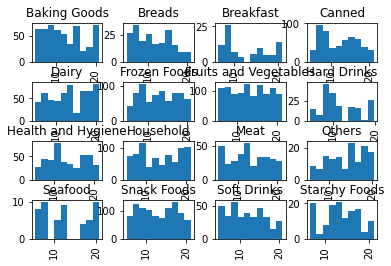

In [13]:
train.hist('Item_Weight', by='Item_Type')
plt.show()

<AxesSubplot:ylabel='Density'>

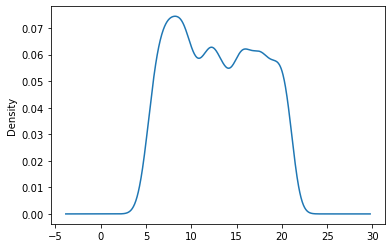

In [14]:
train['Item_Weight'].plot(kind='kde', by='Item_Type')

In [15]:
def fill_missing(cols):
    item_type = cols[0]
    item_weight = cols[1]
    if pd.isnull(item_weight):
        return train[train.Item_Type == item_type]['Item_Weight'].mean()
    else:
        return item_weight

In [16]:
train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Length: 8523, dtype: float64

In [17]:
train.Item_Weight = train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

<AxesSubplot:ylabel='Density'>

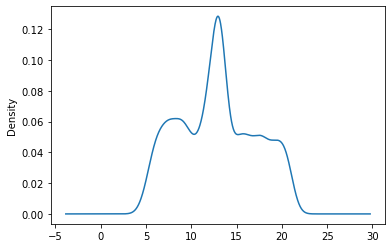

In [18]:
train['Item_Weight'].plot(kind='kde')

In [19]:
train.Outlet_Size

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [20]:
train.Outlet_Size.mode()[0]

'Medium'

In [21]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])

In [22]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat')

In [25]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['reg'], 'Regular')

In [26]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
train['Age'] = 2021 - train.Outlet_Establishment_Year

In [28]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


<AxesSubplot:>

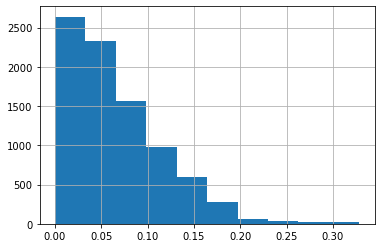

In [29]:
train['Item_Visibility'].hist()

<AxesSubplot:>

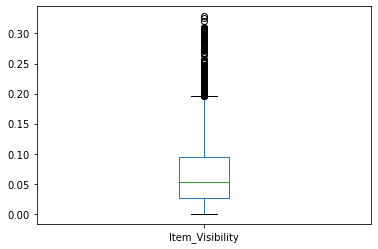

In [30]:
train['Item_Visibility'].plot(kind='box')

In [31]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)

In [32]:
IQR = Q3 - Q1

In [33]:
IQR

0.067595815

In [34]:
filt_train = train[(train.Item_Visibility >= (Q1 - 1.5*IQR)) & (train.Item_Visibility <= (Q3 + 1.5*IQR))]

In [35]:
((train.shape[0] - filt_train.shape[0])/train.shape[0])*100

1.689545934530095

In [36]:
filt_train.shape[0]

8379

In [37]:
train = filt_train.copy()
train.shape

(8379, 13)

In [38]:
train['Item_Visibility'].min(), train['Item_Visibility'].max()

(0.0, 0.195721125)

In [39]:
#creating a category
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], # Creating bins for visibility
                                       labels=['Low Viz', 'Viz', 'High Viz'], include_lowest=True)   # need to specify columns, bins and labels

In [40]:
train['Item_Visibility_bins']

0        Low Viz
1        Low Viz
2        Low Viz
3        Low Viz
4        Low Viz
          ...   
8518     Low Viz
8519     Low Viz
8520     Low Viz
8521    High Viz
8522     Low Viz
Name: Item_Visibility_bins, Length: 8379, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [41]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4929
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8379 non-null   object  
 1   Item_Weight                8379 non-null   float64 
 2   Item_Fat_Content           8379 non-null   object  
 3   Item_Visibility            8379 non-null   float64 
 4   Item_Type                  8379 non-null   object  
 5   Item_MRP                   8379 non-null   float64 
 6   Outlet_Identifier          8379 non-null   object  
 7   Outlet_Establishment_Year  8379 non-null   int64   
 8   Outlet_Size                8379 non-null   object  
 9   Outlet_Location_Type       8379 non-null   object  
 10  Outlet_Type                8379 non-null   object  
 11  Item_Outlet_Sales          8379 non-null   float64 
 12  Age                        8379 non-null   int64   
 13  Item_Visibility_bins       8379 n

In [43]:
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', \
                               'Outlet_Type', 'Item_Visibility_bins'])

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8379 non-null   object 
 1   Item_Weight                    8379 non-null   float64
 2   Item_Visibility                8379 non-null   float64
 3   Item_Type                      8379 non-null   object 
 4   Item_MRP                       8379 non-null   float64
 5   Outlet_Identifier              8379 non-null   object 
 6   Outlet_Establishment_Year      8379 non-null   int64  
 7   Item_Outlet_Sales              8379 non-null   float64
 8   Age                            8379 non-null   int64  
 9   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 10  Item_Fat_Content_Regular       8379 non-null   uint8  
 11  Outlet_Size_High               8379 non-null   uint8  
 12  Outlet_Size_Medium             8379 non-null   u

In [45]:
cols_to_drop = ['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 
                'Outlet_Establishment_Year']

In [46]:
final_train = train.drop(cols_to_drop, axis=1)

In [47]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8379 non-null   float64
 1   Item_MRP                       8379 non-null   float64
 2   Item_Outlet_Sales              8379 non-null   float64
 3   Age                            8379 non-null   int64  
 4   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 5   Item_Fat_Content_Regular       8379 non-null   uint8  
 6   Outlet_Size_High               8379 non-null   uint8  
 7   Outlet_Size_Medium             8379 non-null   uint8  
 8   Outlet_Size_Small              8379 non-null   uint8  
 9   Outlet_Location_Type_Tier 1    8379 non-null   uint8  
 10  Outlet_Location_Type_Tier 2    8379 non-null   uint8  
 11  Outlet_Location_Type_Tier 3    8379 non-null   uint8  
 12  Outlet_Type_Grocery Store      8379 non-null   u

<AxesSubplot:>

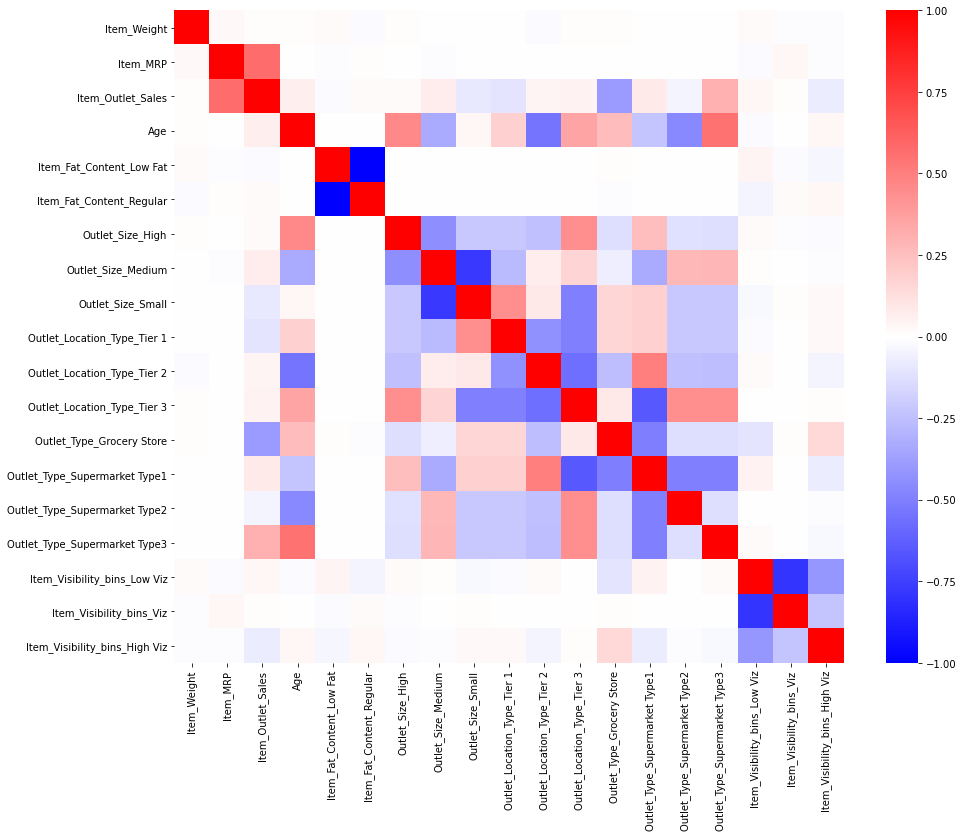

In [48]:
import seaborn as sns

plt.figure(figsize=(15,12))

correlation = final_train.corr()

sns.heatmap(correlation, cmap='bwr')

In [49]:
X = final_train.drop('Item_Outlet_Sales', axis=1)
y = final_train['Item_Outlet_Sales']

In [50]:
X.shape, y.shape

((8379, 18), (8379,))

In [51]:
dc = dict()
for i in list(final_train.columns):
    dc[i] = i.replace(' ','_')

In [52]:
dc

{'Item_Weight': 'Item_Weight',
 'Item_MRP': 'Item_MRP',
 'Item_Outlet_Sales': 'Item_Outlet_Sales',
 'Age': 'Age',
 'Item_Fat_Content_Low Fat': 'Item_Fat_Content_Low_Fat',
 'Item_Fat_Content_Regular': 'Item_Fat_Content_Regular',
 'Outlet_Size_High': 'Outlet_Size_High',
 'Outlet_Size_Medium': 'Outlet_Size_Medium',
 'Outlet_Size_Small': 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1': 'Outlet_Location_Type_Tier_1',
 'Outlet_Location_Type_Tier 2': 'Outlet_Location_Type_Tier_2',
 'Outlet_Location_Type_Tier 3': 'Outlet_Location_Type_Tier_3',
 'Outlet_Type_Grocery Store': 'Outlet_Type_Grocery_Store',
 'Outlet_Type_Supermarket Type1': 'Outlet_Type_Supermarket_Type1',
 'Outlet_Type_Supermarket Type2': 'Outlet_Type_Supermarket_Type2',
 'Outlet_Type_Supermarket Type3': 'Outlet_Type_Supermarket_Type3',
 'Item_Visibility_bins_Low Viz': 'Item_Visibility_bins_Low_Viz',
 'Item_Visibility_bins_Viz': 'Item_Visibility_bins_Viz',
 'Item_Visibility_bins_High Viz': 'Item_Visibility_bins_High_Viz'}

In [53]:
train_new = final_train.rename(dc, axis=1)

In [54]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8379 non-null   float64
 1   Item_MRP                       8379 non-null   float64
 2   Item_Outlet_Sales              8379 non-null   float64
 3   Age                            8379 non-null   int64  
 4   Item_Fat_Content_Low_Fat       8379 non-null   uint8  
 5   Item_Fat_Content_Regular       8379 non-null   uint8  
 6   Outlet_Size_High               8379 non-null   uint8  
 7   Outlet_Size_Medium             8379 non-null   uint8  
 8   Outlet_Size_Small              8379 non-null   uint8  
 9   Outlet_Location_Type_Tier_1    8379 non-null   uint8  
 10  Outlet_Location_Type_Tier_2    8379 non-null   uint8  
 11  Outlet_Location_Type_Tier_3    8379 non-null   uint8  
 12  Outlet_Type_Grocery_Store      8379 non-null   u

In [55]:
'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop('Item_Outlet_Sales', axis=1).columns))

'Item_Outlet_Sales ~ Item_Weight + Item_MRP + Age + Item_Fat_Content_Low_Fat + Item_Fat_Content_Regular + Outlet_Size_High + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier_1 + Outlet_Location_Type_Tier_2 + Outlet_Location_Type_Tier_3 + Outlet_Type_Grocery_Store + Outlet_Type_Supermarket_Type1 + Outlet_Type_Supermarket_Type2 + Outlet_Type_Supermarket_Type3 + Item_Visibility_bins_Low_Viz + Item_Visibility_bins_Viz + Item_Visibility_bins_High_Viz'

In [56]:
formula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop('Item_Outlet_Sales', axis=1).columns))

In [57]:
print(formula)

Item_Outlet_Sales ~ Item_Weight + Item_MRP + Age + Item_Fat_Content_Low_Fat + Item_Fat_Content_Regular + Outlet_Size_High + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier_1 + Outlet_Location_Type_Tier_2 + Outlet_Location_Type_Tier_3 + Outlet_Type_Grocery_Store + Outlet_Type_Supermarket_Type1 + Outlet_Type_Supermarket_Type2 + Outlet_Type_Supermarket_Type3 + Item_Visibility_bins_Low_Viz + Item_Visibility_bins_Viz + Item_Visibility_bins_High_Viz


In [58]:
import statsmodels.formula.api as smf

lm = smf.ols(formula=formula, data=train_new).fit()

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     813.9
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:44:10   Log-Likelihood:                -70808.
No. Observations:                8379   AIC:                         1.416e+05
Df Residuals:                    8365   BIC:                         1.417e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       462.5095    131.138      3.527      0.000     205.446     719.573
Item_Weight                      -0.6196      2.916     -0.212      0.832      -6.336       5.097
Item_MRP                         15.7921      0.199     79.370      0.000      15.402      16.182
Age                             -40.0428     10.260     -3.903      0.000     -60.154     -19.931
Item_Fat_Content_Low_Fat        206.7770     66.820      3.095      0.002      75.793     337.761
Item_Fat_Content_Regular        255.7325     66.862      3.825      0.000     124.666     386.799
Outlet_Size_High                765.3142    210.644      3.633      0.000     352.400    1178.229
Outlet_Size_Medium             -189.1930     48.141     -3.930      0.000    -283.562     -94.824
Outlet_Size_Small              -113.6117     46.827     -2.426      0.015    -205.405     -21.819
Outlet_Location_Type_Tier_1     395.3001    110.306      3.584      0.000     179.072     611.528
Outlet_Location_Type_Tier_2     165.7046     57.721      2.871      0.004      52.557     278.852
Outlet_Location_Type_Tier_3     -98.4952     52.324     -1.882      0.060    -201.063       4.073
Outlet_Type_Grocery_Store     -1520.5529     67.564    -22.505      0.000   -1652.995   -1388.110
Outlet_Type_Supermarket_Type1   -79.2366     85.112     -0.931      0.352    -246.078      87.605
Outlet_Type_Supermarket_Type2  -313.2750     70.594     -4.438      0.000    -451.657    -174.893
Outlet_Type_Supermarket_Type3  2375.5739    197.569     12.024      0.000    1988.290    2762.857
Item_Visibility_bins_Low_Viz    164.4494     47.146      3.488      0.000      72.032     256.867
Item_Visibility_bins_Viz        161.8172     48.073      3.366      0.001      67.583     256.052
Item_Visibility_bins_High_Viz   136.2428     51.885      2.626      0.009      34.536     237.949
==============================================================================
Omnibus:                      909.878   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.653
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       5.131   Cond. No.                     4.14e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
trainX, testX, trainY, testY = train_test_split(X,y, test_size=0.3)

In [62]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((5865, 18), (2514, 18), (5865,), (2514,))

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(trainX, trainY)

LinearRegression()

In [65]:
lm.intercept_

1295.5952729488324

In [66]:
lm.coef_

array([-1.49219909e+00,  1.56966282e+01, -4.00370980e+01, -2.76276103e+01,
        2.76276103e+01,  6.03924387e+02, -3.19285710e+02, -2.84638677e+02,
        2.44270037e+02,  1.57221551e+01, -2.59992192e+02, -1.62965854e+03,
       -2.16901291e+02, -4.23589348e+02,  2.27014918e+03,  9.81895179e+00,
        1.80541421e+01, -2.78730939e+01])

In [67]:
trainX.columns

Index(['Item_Weight', 'Item_MRP', 'Age', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Visibility_bins_Low Viz', 'Item_Visibility_bins_Viz',
       'Item_Visibility_bins_High Viz'],
      dtype='object')

In [68]:
lm.score(trainX, trainY)

0.5596028088756466

In [69]:
lm.score(testX, testY)

0.5548580240214994

In [70]:
predicted_y = lm.predict(testX)

In [71]:
predicted_y

array([2244.86101913, 2972.17477651, 1717.26498336, ..., 3221.25734406,
       2241.50490291, 4355.65629571])

# Dealing with Overfitting if that is the case !!

In [72]:
from sklearn.linear_model import Ridge, Lasso

In [73]:
ridge = Ridge()

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [76]:
gscv = GridSearchCV(ridge, param_grid=parameters, cv=3, verbose=2)

In [77]:
gscv.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}, verbose=2)

In [78]:
gscv.best_params_['alpha']

0.1

In [81]:
gscv.best_score_

0.5566710880768558

In [79]:
ridge = Ridge(alpha=0.1)

In [82]:
lasso = Lasso()

In [83]:
lasso.fit(trainX, trainY)

Lasso()

In [84]:
lasso.score(trainX, trainY)

0.5590228829469994

In [85]:
lasso.score(testX, testY)

0.5542253971804901

In [86]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [87]:
gscv = GridSearchCV(lasso, param_grid=parameters, cv=3)

In [88]:
gscv.fit(trainX, trainY)

C:\Users\Amol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1569554736.8025284, tolerance: 1147546.080149016
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381153507.61224794, tolerance: 1173334.3921579057
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360470324.116302, tolerance: 1147546.080149016
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [89]:
gscv.best_params_['alpha']

0.01